#  Итоговый проект на тему «Анализ данных»
## выполнил студент: Вихарев Илья Олегович (МКм-2301-51-00)

## 1. Загрузка библиотек

In [2]:
import numpy as np # Подключаем модуль линейной алгебры
import pandas as pd # Подключаем обработку данных
import matplotlib.pyplot as plt # Подключаем модуль визуализации
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Создание рабочей папки, загрузка датасета с Kaggle, распаковка zip. 

P.S Для проверки можно вручную скачать или воспользоваться скриптом ниже: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [ ]:
# Установить kagglehub если отсутствует. 

In [ ]:
pip install kagglehub[pandas-datasets]

In [ ]:
import os  
os.mkdir('VyatSU_Final_Project')  

In [ ]:

path = os.getcwd() + '\\VyatSU_Final_Project\\vehicles'
path

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
# Set the path to the file you'd like to load
file_path = ""
# Load the latest version
path_dataset = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")
print("Path to dataset files:", path_dataset+'\\vehicles.csv')

In [ ]:
# перенести файлы с кеша в рабочую папку
import os
import shutil
from pathlib import Path  
# Установить целевой каталог  
path = Path(path)
path_dataset = Path(path_dataset)
os.replace(path_dataset, path)

##### Очистить кеш. (Можете вручную удалить кэш kaggle по вышеуказанному пути)

In [ ]:
shutil.rmtree(path_dataset.parents[4]) 

## 3. Разведочный анализ датасета

####

In [5]:
df = pd.read_csv('vehicles//vehicles.csv')
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


#### Посмотрим размерность датасета и его столбцы

In [74]:
print(df.shape)
print(df.columns)

(426880, 26)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

В датафрейме 19 столбцов имеют тип object, 5 столбцов имеют тип float64, 2 столбца int64

1. id: уникальное id объявления 
1. url: ссылка на объявление (не работает)           
1. region: регион продажи авто (город/штат США)        
1. region_url: ссылка на объявление (не работает)      
1. price: цена в долларах     
1. year: год выпуска автомобиля     
1. manufacturer: марка авто (завод-изготовитель)
1. model: модель авто         
1. condition: состояние авто     
1. cylinders: кол-во цилиндров     
1. fuel: тип потребляемого топлива          
1. odometer: пробег      
1. title_status: юридический статус авто в страховой компании
1. transmission: тип КПП
1. VIN: вин-номер авто           
1. drive: тип привода     
1. size:  размер авто (по американской классификации https://housegrail.com/types-of-car-sizes-explained)  
1. type:  тип авто     
1. paint_color: цвет авто   
1. image_url: ссылка на фото авто (не работает)    
1. description: описание   
1. county: страна (Null, что очевидно, так как это всё американские объявления)     
1. state: штат США        
1. lat: ширина (координаты)           
1. long: долгота (координаты)          
1. posting_date: дата размещения поста

### 3.1 Удаление ненужных столбцов, удаление строк с Null

In [76]:
#Удаляем ненужные нам столбцы
df = df.drop("id", axis=1)
df = df.drop("region", axis=1)
df = df.drop("state", axis=1)
df = df.drop("model", axis=1)
df = df.drop("url", axis=1)
df = df.drop("region_url", axis=1)
df = df.drop("image_url", axis=1)
df = df.drop("description", axis=1)
df = df.drop("county", axis=1)
df = df.drop("posting_date", axis=1)
df = df.drop("VIN", axis=1)
df = df.drop("lat", axis=1)
df = df.drop("long", axis=1)
df = df.drop("title_status", axis=1)
df = df.drop("size", axis=1)


In [77]:
# Удалим строки с пустыми значениями (Смысла нет заполнять пустые значения. Нам вполне хватит количества записей для анализа и обучения модели)
df = df.dropna()

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   transmission  117169 non-null  object 
 8   drive         117169 non-null  object 
 9   type          117169 non-null  object 
 10  paint_color   117169 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.7+ MB
None


### 3.2 Рассмотрим уникальные значения и перекодируем категориальные данные в численные. 

Подсчитаем количество уникальных значений в столбцах и создадим таблицу замен значений

In [ ]:

def get_unique(df: pd.DataFrame, stolbec: str):
    """
    Возвращает список замен и кол-во уникальных элементов в столбце
    """
    df_uniques = pd.melt(
        frame=df,
        value_vars=[stolbec],
    )
    df_uniques = (
        pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
        .sort_index(level=[0, 1])
        .rename(columns={"value": "count"})
        .reset_index()
    )
    return df_uniques
 
     
              
manufacturer_unique = get_unique(df,"manufacturer")                    
condition_unique = get_unique(df,"condition")           
cylinders_unique = get_unique(df,"cylinders")           
fuel_unique = get_unique(df,"fuel")                           
transmission_unique = get_unique(df,"transmission")                        
drive_unique = get_unique(df,"drive")               
type_unique = get_unique(df,"type")                
paint_color_unique = get_unique(df,"paint_color")         
         
    



In [80]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,other,4wd,pickup,black
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,other,4wd,pickup,red


Переход к числовым данным

In [81]:

# Encoding categorical features
categorical_columns = ["condition","cylinders","fuel","transmission","drive","type","paint_color"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013,ford,0,5,2,128000,0,2,10,0
32,27990,2012,gmc,2,6,2,68696,2,0,8,0
33,34590,2016,chevrolet,2,5,2,29499,2,0,8,9
34,35000,2019,toyota,0,5,2,43000,0,0,10,5
35,29990,2016,chevrolet,2,5,2,17302,2,0,8,8
36,38590,2011,chevrolet,2,6,2,30237,2,2,7,8
38,32990,2017,jeep,2,5,2,30041,2,0,7,9
42,37990,2016,chevrolet,2,6,2,9704,2,2,3,8
45,27990,2018,nissan,2,5,2,37332,2,0,8,9
55,19900,2004,ford,2,6,0,88000,0,0,8,1


### 3.3 Рассмотрим статистические данные через describe и удалим шум в данных. 

Метод describe показывает основные статистические характеристики каждого числового признака (типы int64 и float64): количество значений, не являющихся пропущенными, среднее значение, стандартное отклонение, диапазон, медиана, квартили 0,25 и 0,75.

In [82]:
df.describe()

,price,year,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
count,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000,1.171690e+05,117169.000000,117169.000000,117169.000000,117169.000000
mean,6.082322e+04,2009.400149,1.194249,4.639487,1.930562,1.122838e+05,0.281918,0.814149,6.040847,5.623458
std,1.140808e+07,9.925172,1.155768,1.277759,0.543190,2.247850e+05,0.642434,0.791092,4.065271,4.016522
min,0.000000e+00,1900.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.700000e+03,2006.000000,0.000000,3.000000,2.000000,5.566600e+04,0.000000,0.000000,2.000000,1.000000
50%,1.099300e+04,2012.000000,2.000000,5.000000,2.000000,1.027990e+05,0.000000,1.000000,8.000000,8.000000
75%,2.275000e+04,2015.000000,2.000000,6.000000,2.000000,1.478480e+05,0.000000,1.000000,9.000000,10.000000
max,3.736929e+09,2022.000000,5.000000,7.000000,4.000000,1.000000e+07,2.000000,2.000000,12.000000,11.000000


Рассмотрим гистограммы для price, odometer, year

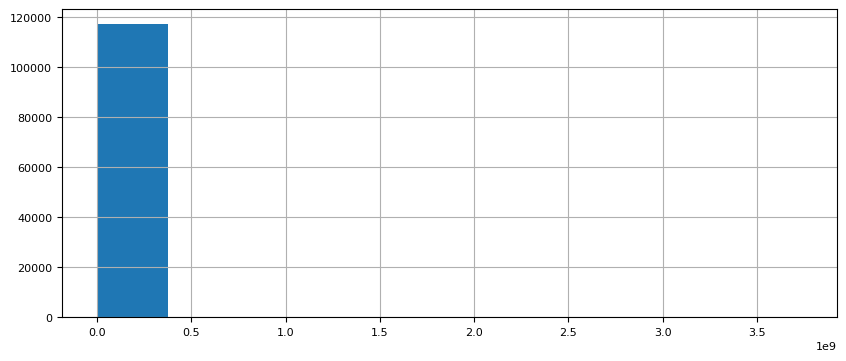

In [83]:
df['price'].hist(figsize=(10, 4));

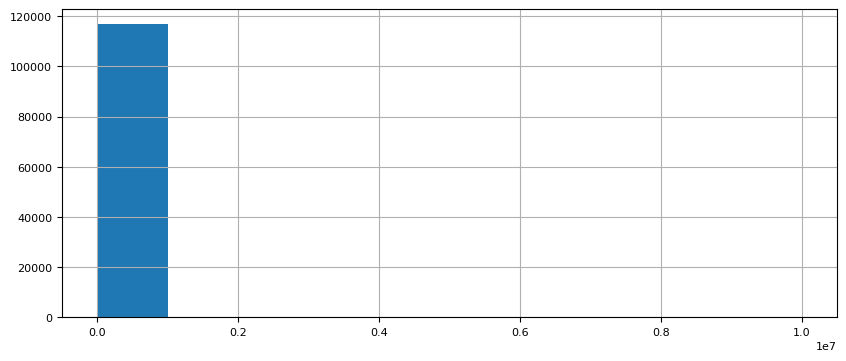

In [84]:
df['odometer'].hist(figsize=(10, 4));

По гистограммам и describe видим, что в цене и пробеге есть нулевые значения. В некоторых объявлениях специально выставлена неадекватно большая цена или пробег. Из-за этого гистограмма цены и пробега выглядит неправильно. Это нужно исправить, выбрав порог цены от 1000$ до 40000$

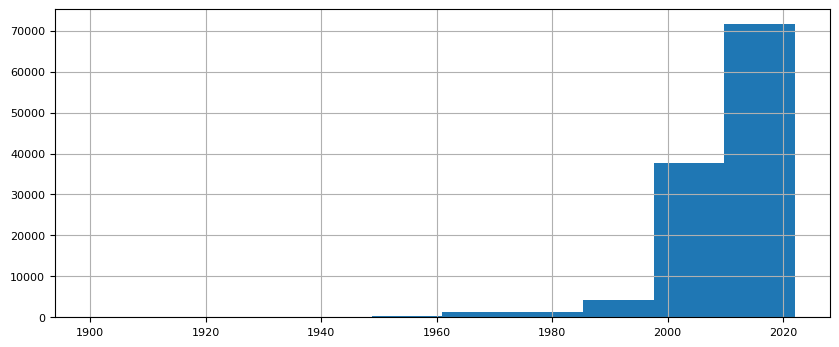

In [85]:
df['year'].hist(figsize=(10, 4));

Также мы видим, что некоторые авто 1905 года выпуска. Возьмем все авто от 2000-го года, поскольку там наибольшее кол-во авто. 

In [86]:
price_unique = get_unique(df,"price")  
price_unique

,variable,value,count
0,price,0,4373
1,price,1,878
2,price,3,2
3,price,4,3
4,price,5,8
...,...,...,...
5240,price,17000000,1
5241,price,123456789,2
5242,price,135008900,1
5243,price,1111111111,1


In [87]:
year_unique = get_unique(df,"year")  
year_unique

,variable,value,count
0,year,1900,1
1,year,1905,1
2,year,1913,2
3,year,1916,1
4,year,1918,1
...,...,...,...
99,year,2018,6085
100,year,2019,4498
101,year,2020,2774
102,year,2021,259


Исправим датасет, согласно нашим замечаниям

In [88]:
df = df[df['price'] > 1000]
df = df[df['price'] < 40000]

df['odometer'] = df['odometer'] // 5000
df = df[df['odometer'] < 50]
df = df[df['year'] > 2000]

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92920 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         92920 non-null  int64 
 1   year          92920 non-null  int64 
 2   manufacturer  92920 non-null  object
 3   condition     92920 non-null  int64 
 4   cylinders     92920 non-null  int64 
 5   fuel          92920 non-null  int64 
 6   odometer      92920 non-null  int64 
 7   transmission  92920 non-null  int64 
 8   drive         92920 non-null  int64 
 9   type          92920 non-null  int64 
 10  paint_color   92920 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 8.5+ MB


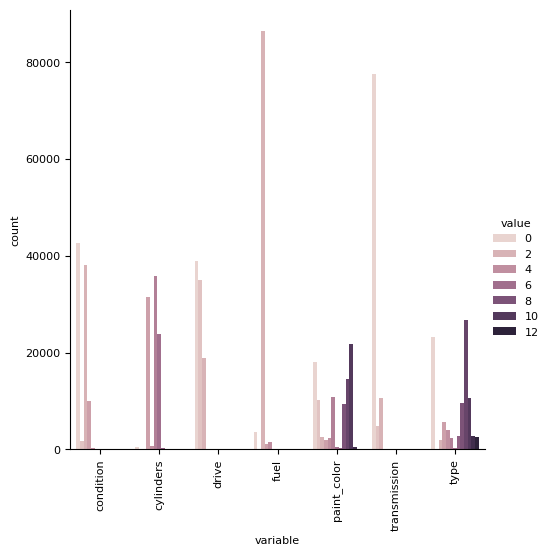

In [90]:
import seaborn as sns
df_uniques = pd.melt(
    frame=df,
    value_vars=["condition","cylinders","fuel","transmission","drive","type","paint_color"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

Снова посмотрим на гистограммы

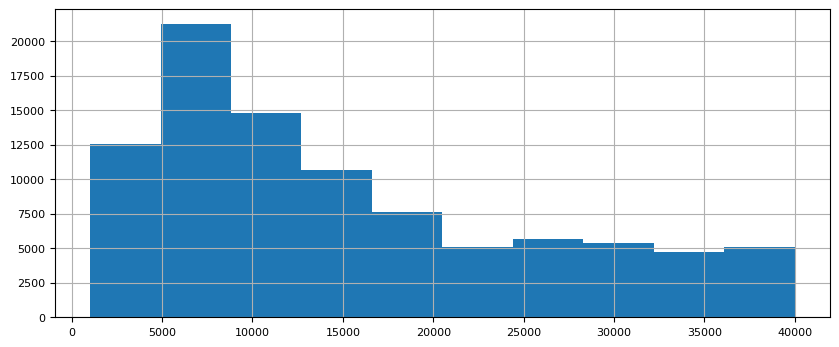

In [91]:
df['price'].hist(figsize=(10, 4));

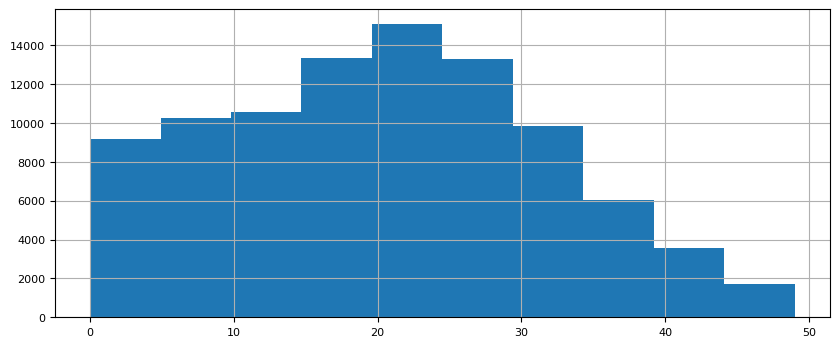

In [92]:
df['odometer'].hist(figsize=(10, 4));

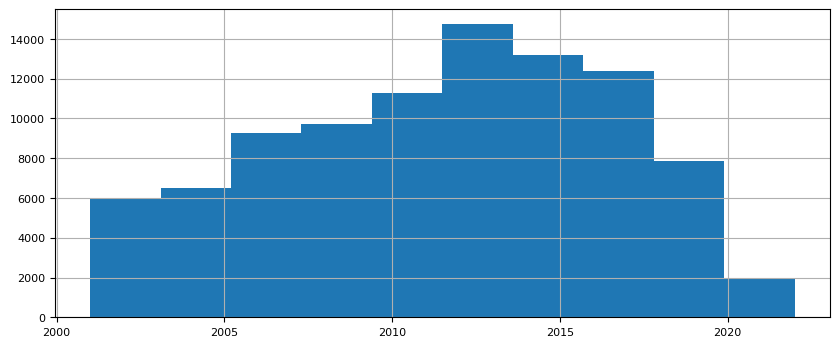

In [93]:
df['year'].hist(figsize=(10, 4));

### 4. Исследовательский анализ данных

Посмотрим средние цены по маркам авто:

['acura', 'alfa-romeo', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']


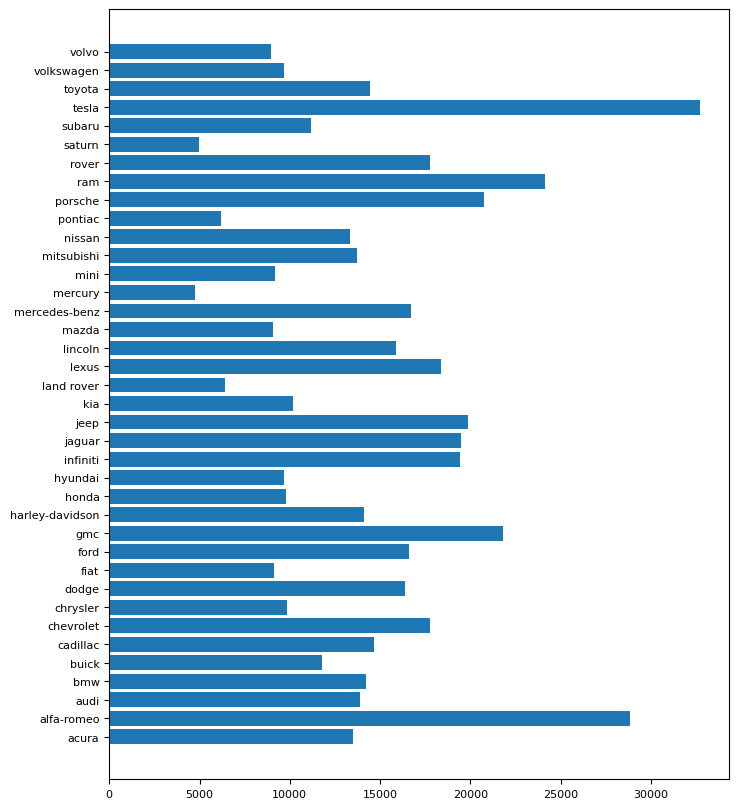

In [94]:
# Должность (job_title)
manufacturers = df.manufacturer.unique().tolist()
manufacturers.sort() # Для удобства отсортируем по алфавиту
print(manufacturers)
len(manufacturers) # Подсчитаем их количество
# Посчитаем средние цены по маркам авто
n = len(manufacturers) 
mean_salaries = np.zeros(n)
for i in range(0,n):
    position = manufacturers[i] #текущая должность
    df_tmp = df[df['manufacturer'] == position] # выбираем соотвествующие записи 
    mean_salaries[i] = df_tmp['price'].mean() # считаем среднее значение
# Визуализируем уровень зарплат в зависимости от должности
fig = plt.figure(figsize=(8, 10))
plt.rc('font', size = 8 ) 
plt.barh(manufacturers, mean_salaries)
plt.show()

Наибольшую среднюю цену имеют Alfa-Romeo, Tesla, Dodge Ram, GMC, Porsche, что вполне очевидно. Alfa-Romeo - импортный итальянский автомобиль премиум сегмента. Tesla - дорогостоящий электрокар. Dodge RAM - популярный у американцев пикап, как и GMC - универсальные рабочие лошадки, но цены рознятся в зависимости от мотора и комплектации. Porsche давно зарекомендовал себя как наилучшее и наиболее качественное немецкое спортивное авто на американском рынке, пусть и за большую цену. 

Посмотрим наиболее дешевую и дорогую марку

In [95]:

max_salary = mean_salaries.max()
min_salary = mean_salaries.min()

max_ind = (mean_salaries.tolist()).index(max_salary)
print("Максимальная стоймость у", manufacturers[max_ind])
min_ind = (mean_salaries.tolist()).index(min_salary)
print("Минимальная стоймость у", manufacturers[min_ind])

Максимальная стоймость у tesla
Минимальная стоймость у mercury


Довольно очевидно, что mercury имеет минимальную стоймость.  Данная марка авто не выпускается с 2011-го и имеет крайне сомнительную репутацию из-за того, что новые модели являются перелицензированными копиями автомобилей компании Ford и Mazda и не отличаются особой надежностью. Тем более, если смотреть данные продаж от дилеров Mercury, компания была в глубоком кризисе. 
(https://en.wikipedia.org/wiki/Mercury_(automobile))

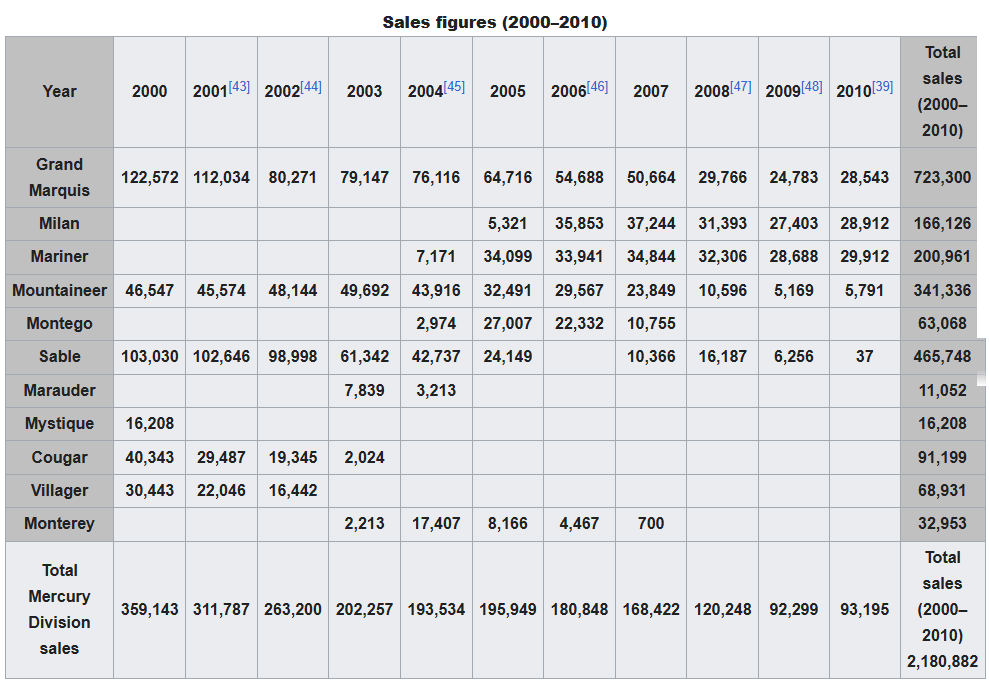

Теперь заменим марки авто на численные данные, вместо категориальных. 

In [96]:

# Encoding categorical features
categorical_columns = ["manufacturer"]
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))
df['year'] = (df['year']).astype(int)
df['odometer'] = df['odometer'].astype(int)
df.head(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013,10,0,5,2,25,0,2,10,0
32,27990,2012,11,2,6,2,13,2,0,8,0
33,34590,2016,6,2,5,2,5,2,0,8,9
34,35000,2019,35,0,5,2,8,0,0,10,5
35,29990,2016,6,2,5,2,3,2,0,8,8
36,38590,2011,6,2,6,2,6,2,2,7,8
38,32990,2017,17,2,5,2,6,2,0,7,9
42,37990,2016,6,2,6,2,1,2,2,3,8
45,27990,2018,27,2,5,2,7,2,0,8,9
55,19900,2004,10,2,6,0,17,0,0,8,1


Посчитаем коэффициенты корреляции для всего датафрейма, округлим значение до сотых.
Выведем полученную корреляционную матрицу.

In [97]:
corr_matrix = df.corr().round(2)
corr_matrix

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
price,1.00,0.63,-0.07,0.14,0.36,-0.05,-0.61,0.50,-0.07,0.05,0.05
year,0.63,1.00,-0.02,0.08,-0.10,0.12,-0.62,0.30,-0.05,0.02,0.01
manufacturer,-0.07,-0.02,1.00,-0.03,-0.23,0.02,0.03,-0.02,-0.10,0.01,-0.01
condition,0.14,0.08,-0.03,1.00,0.08,0.04,-0.12,0.23,0.05,0.05,0.00
cylinders,0.36,-0.10,-0.23,0.08,1.00,-0.09,0.03,0.18,-0.02,0.02,0.03
fuel,-0.05,0.12,0.02,0.04,-0.09,1.00,-0.14,0.13,0.04,-0.09,-0.06
odometer,-0.61,-0.62,0.03,-0.12,0.03,-0.14,1.00,-0.42,-0.09,-0.01,0.00
transmission,0.50,0.30,-0.02,0.23,0.18,0.13,-0.42,1.00,0.05,0.00,-0.02
drive,-0.07,-0.05,-0.10,0.05,-0.02,0.04,-0.09,0.05,1.00,0.16,0.08
type,0.05,0.02,0.01,0.05,0.02,-0.09,-0.01,0.00,0.16,1.00,0.07


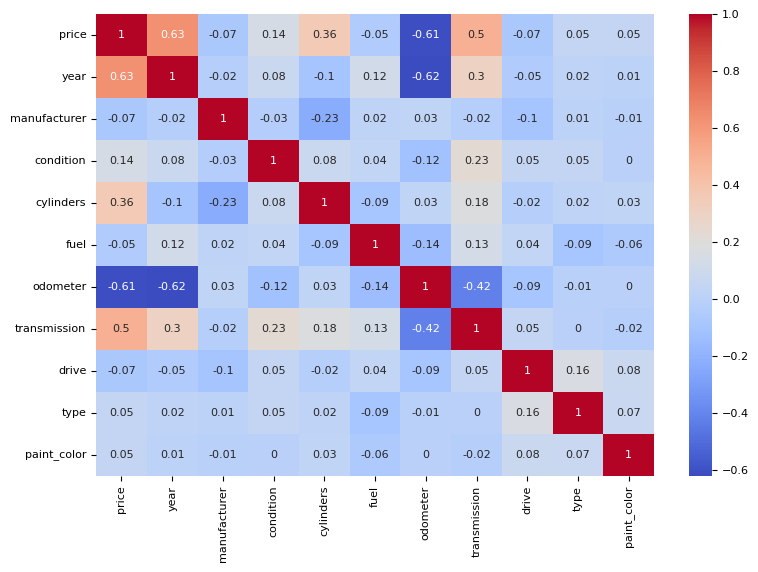

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

Для интереса, можно посмотреть матрицу корреляции и заметить, что, например, тип КПП на 16% зависит от типа авто, что вполне правдиво. Трансмиссия зависит от года выпуска - с развитием автомобилестроения все чаще стали применять автоматическую и роботизированную КПП, поскольку это удобно. Очевидно, что пробег и год взаимосвязаны. Топливо на 13% зависит от года и от типа трансмиссии, что тоже вполне очевидно, если вспомнить про топливный кризис США в 1970-х и массовый переход американских автомобилестроителей с V6 и V8 на R4 (рядные четверки) с передним приводом, вместо заднего, ради экономии топлива. Тогда же на рынке стали массово появлятся дешевые экономичные импортные авто (Toyota). Но, по всей видимости, тенденция не так сильно сохранилась.  

Посмотрим графики цилиндров и трансмиссии. Правда ли, что американцы любят V8? Правда ли, что люди стали массово переходить на автоматическую КПП? 

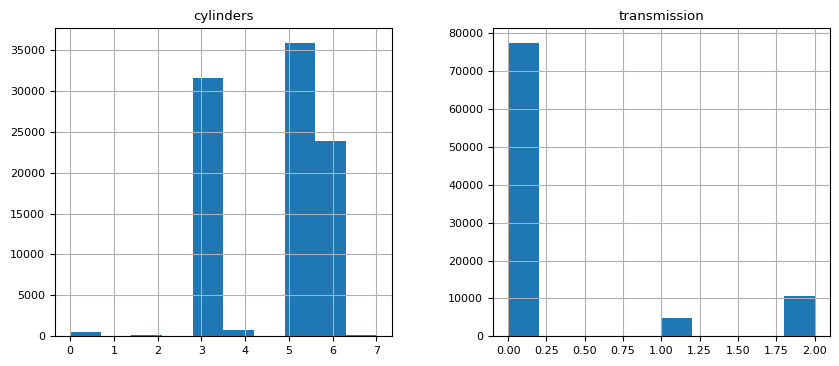

In [99]:
features = ["cylinders", "transmission"]
df[features].hist(figsize=(10, 4));

In [100]:
cylinders_unique

,variable,value,count
0,cylinders,10 cylinders,883
1,cylinders,12 cylinders,63
2,cylinders,3 cylinders,218
3,cylinders,4 cylinders,35985
4,cylinders,5 cylinders,930
5,cylinders,6 cylinders,43425
6,cylinders,8 cylinders,35350
7,cylinders,other,315


In [101]:
transmission_unique

,variable,value,count
0,transmission,automatic,96456
1,transmission,manual,8394
2,transmission,other,12319


Отчасти, правда, что американцы любят авто помощнее (6 или 8 цилиндров), но есть и приверженцы малолитражных рядных четверок. Что печально, американцы стали переходить на автоматическую коробку передач, судя по количеству объявлений. 

## 4. Построение графиков отношения цены автомобиля от пяти наиболее коррелирующих свойств. 

Построим график зависимости цены авто от года выпуска, пробега, состояния, количества цилиндров и типа кпп. 

In [31]:
condition_unique

,variable,value,count
0,condition,excellent,52698
1,condition,fair,3861
2,condition,good,46997
3,condition,like new,12684
4,condition,new,623
5,condition,salvage,306


## 5. Задача регресии. Прогнозирование цены на автомобиль

Для решения задачи регрессии мы воспользуемся таким понятием, как PCA - анализ главных компонент. 

#### Решение задачи через линейную регрессию

In [102]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 
pipe_lr = make_pipeline(StandardScaler(),LinearRegression())
pipe_lr.fit(X_train, y_train)
Y_pred = pipe_lr.predict(X_test)
test_acc = mean_squared_error(Y_pred,y_test)**0.5
print ( f' Точность на тестовых данных:  {test_acc:.3f} ')

 Точность на тестовых данных:  5858.147 


Text(0, 0.5, 'Predicted values')

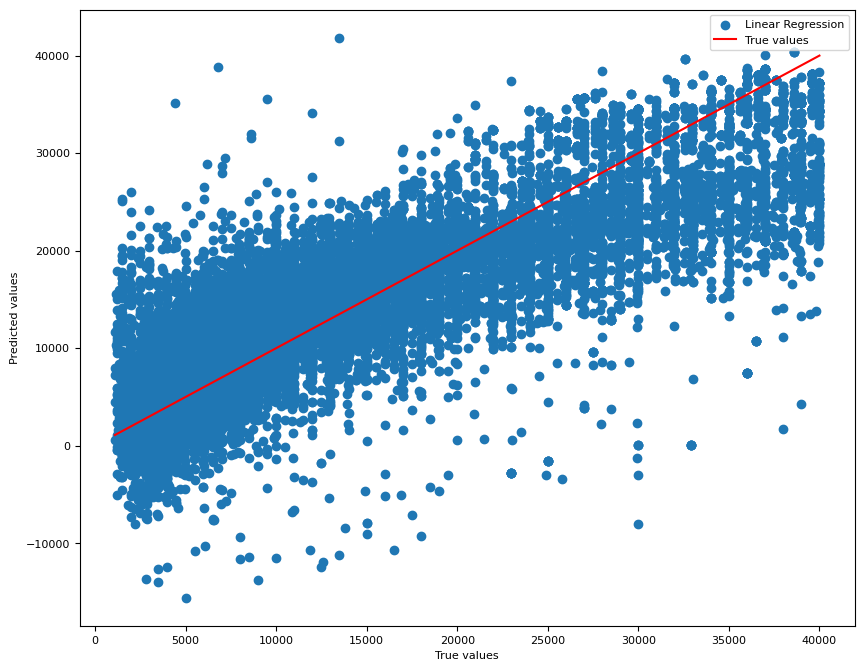

In [103]:
# Визуализация предсказаний
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
y_pred_ordered = Y_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")

Решение квадратичной регрессией 

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


# Обучение модели
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Прогнозирование
y_pred = model.predict(X_poly_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse**0.5}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4733.7854383851945
R^2 Score: 0.7998432088113506


Text(0, 0.5, 'Predicted values')

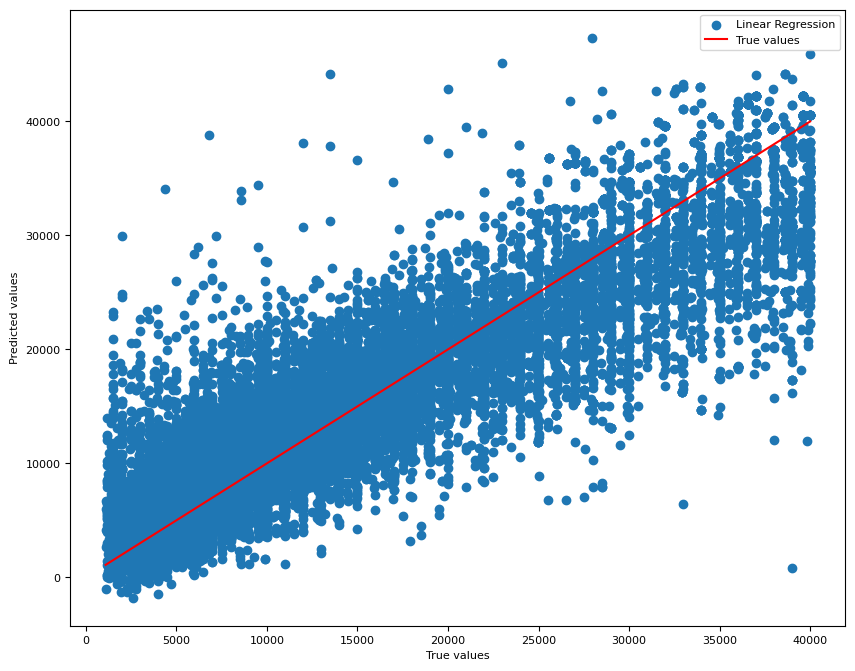

In [109]:
# Визуализация предсказаний
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
y_pred_ordered = y_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")

Text(0, 0.5, 'Predicted values')

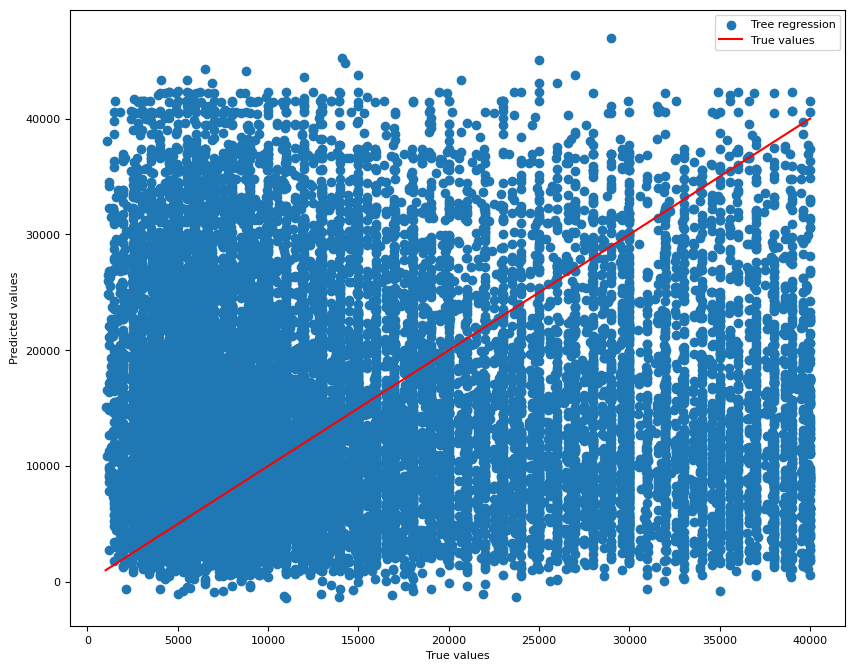

In [52]:
# Визуализация предсказаний
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
y_pred_ordered = Y_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Tree regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")

#### Решение задачи через линейную регрессию с градиентным спуском

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegressionGD
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) 
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=10),LinearRegressionGD())
pipe_lr.fit(X_train, y_train)
Y_pred = pipe_lr.predict(X_test)
test_acc = mean_squared_error(Y_pred,y_test)**0.5
print ( f' Точность на тестовых данных:  {test_acc:.3f} ')

ImportError: cannot import name 'LinearRegressionGD' from 'sklearn.linear_model' (c:\Users\ilyav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\__init__.py)

#### Решение задачи через деревья

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
tree_model.fit(X_train, y_train)
Y_pred = tree_model.predict(X_test)
test_acc = mean_squared_error(Y_pred,y_test)**0.5
print ( f' Точность на тестовых данных:  {test_acc:.3f} ')



 Точность на тестовых данных:  4209.836 


In [61]:
y_test_ordered

array([ 1012,  1100,  1100, ..., 39999, 39999, 39999], shape=(18584,))

In [69]:
order

array([ 8176,  2646,  4308, ..., 10594, 10700, 10875], shape=(18584,))

Text(0, 0.5, 'Predicted values')

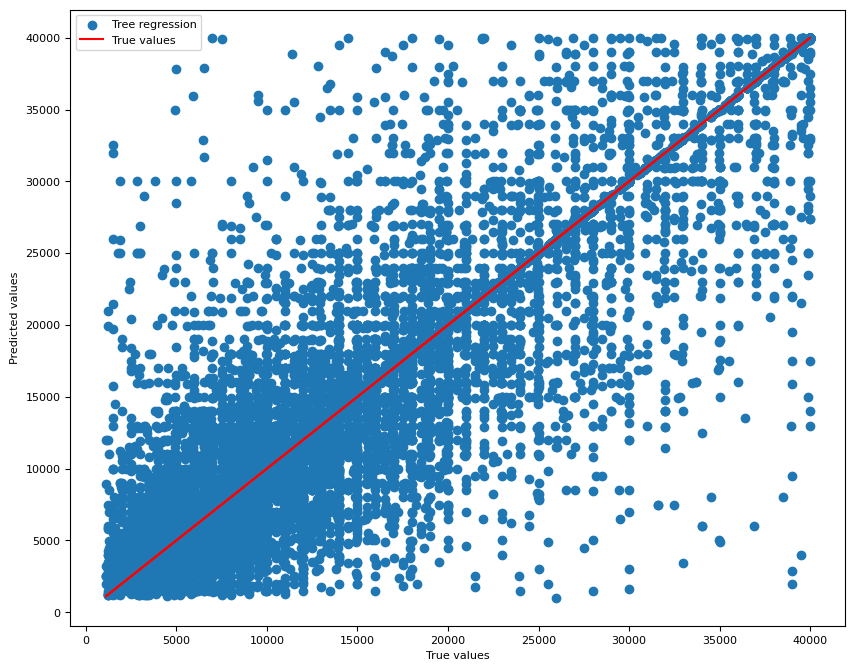

In [70]:
# Визуализация предсказаний
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
y_pred_ordered = Y_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test, Y_pred, label="Tree regression")
plt.plot(y_test, y_test, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")

#### Решение через метод опорных векторов

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C=1.0, random_state = 1)
svm.fit(X_train, y_train)
Y_pred = svm.predict(X_test)
test_acc = mean_squared_error(Y_pred,y_test)**0.5
print ( f' Точность на тестовых данных:  {test_acc:.3f} ')


In [ ]:
# отберём признаки с наиболее высокой корреляцией с целевой переменной
# и поместим их в переменную X
X = df[['work_year', 'experience_level', 'employment_type']]
y = df['salary_in_usd']


In [ ]:
from sklearn.model_selection import train_test_split

# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 20%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# размерность обучающей выборки
print(X_train.shape, y_train.shape)
# размерность тестовой выборки
print(X_test.shape, y_test.shape)

#### Модель линейной регрессии

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

In [ ]:
# на основе нескольких независимых переменных (Х) предскажем заработную плату (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью диапазона индексов
print(np.round(y_pred[:5],2))

Оценим точность полученной модели

In [ ]:
# импортируем модуль метрик
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения зарплат
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# посмотрим на еще одну метрику, R2
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

In [ ]:
# Визуализация предсказаний
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
y_pred_ordered = y_pred[order]

plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, y_pred_ordered, label="Linear Regression")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")

plt.legend()

plt.xlabel("True values")
plt.ylabel("Predicted values")

#### Метод k-ближайших соседей

In [ ]:
# из библиотеки sklearn импортируем регрессию по методу k-ближайших соседей 
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor()
# обучим новую модель
model2.fit(X_train, y_train)


In [ ]:
# найдем прогнозируемые значения и вычислим метрики
pred_knn = model2.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.round(np.sqrt(metrics.mean_squared_error(y_test, pred_knn)), 2))
print('R2:', np.round(metrics.r2_score(y_test, pred_knn), 2))

In [ ]:
# Визуализация предсказаний
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_knn[order], label="kNN")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");